<a href="https://colab.research.google.com/github/CSheppardCodes/Scholastic-Study-of-Machine-Learning/blob/main/SGDRgressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install numpy

In [ ]:
#!pip install pandas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Hlopez490/ML01/main/student-mat.csv", sep=';')

In [ ]:
# remove unecessary columns (Last 2 columns were null, and date and time are irrelivant to our calculations)
data = data.dropna()

In [ ]:
# split training and testing data
X = data[["Speed","Angle"]].copy()
y = data[["Power"]].copy()

In [ ]:
X

,Speed,Angle
0,1,-5
1,2,5
2,3,-2
3,1,2
4,2,0
5,6,-5
6,7,5
7,6,-2
8,7,2
9,6,0


In [ ]:
X=(X-X.min())/(X.max()-X.min())
X["intercept"] = 1
X = X[["intercept","Speed","Angle"]]
X

,intercept,Speed,Angle
0,1,0.000000,0.0
1,1,0.111111,1.0
2,1,0.222222,0.3
3,1,0.000000,0.7
4,1,0.111111,0.5
5,1,0.555556,0.0
6,1,0.666667,1.0
7,1,0.555556,0.3
8,1,0.666667,0.7
9,1,0.555556,0.5


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)

In [ ]:
model = SGDRegressor(alpha=0.005, eta0=0.0001, max_iter = 1000000, tol = 0.0000001)
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.005, eta0=0.0001, max_iter=1000000, tol=1e-07)

In [ ]:
y_predictt = model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_predictt)))
r2 = r2_score(y_train, y_predictt)

In [ ]:
rmse,r2

(0.1124011241531095, -0.2634012710882734)

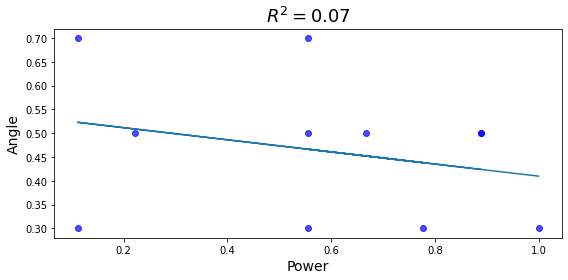

In [ ]:
X = x_test["Speed"].values.reshape(-1,1)
y = y_test['Power'].values

linReg = linear_model.LinearRegression()
model = linReg.fit(X, y)
response = model.predict(X)
r2 = model.score(X, y)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response)
ax.scatter(X, y, c='blue' ,alpha=0.7)
ax.set_ylabel('Angle', fontsize=14)
ax.set_xlabel('Power', fontsize=14)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()